# Fruits and Vegetables Image Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### Define Dataset Paths and Image Dimensions

In [2]:
data_train_path = "Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/test"
data_val_path = "Fruits_Vegetables/validation"

In [3]:
img_width = 180
img_height = 180

### Load Dataset

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [18]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


### Visualize Sample Images

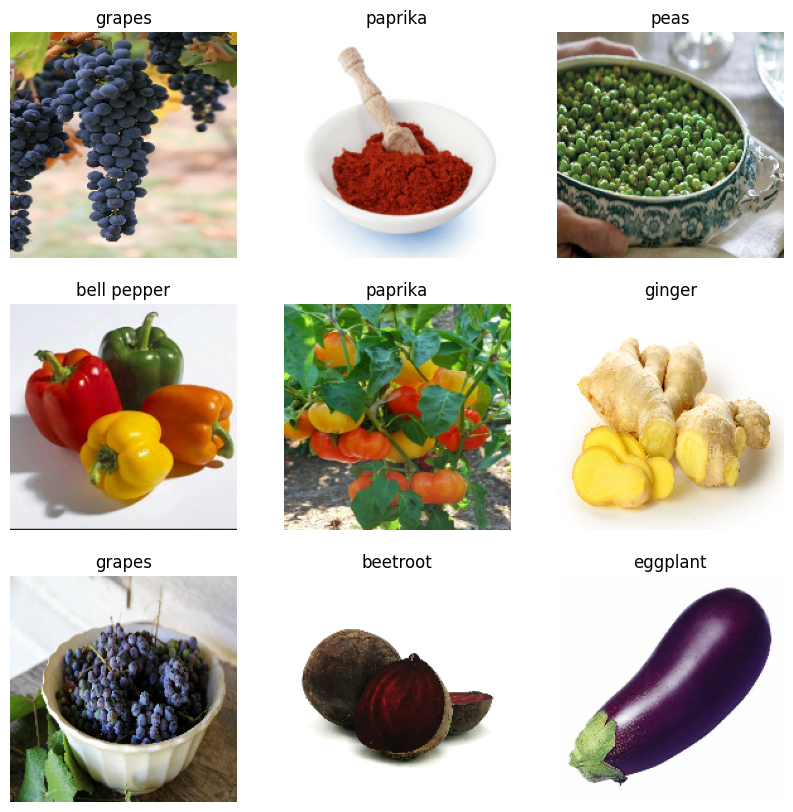

In [8]:
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

### Define the Model Architecture


In [9]:
from tensorflow.keras.models import Sequential

In [10]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model = Sequential([
    layers.Rescaling(1./225),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Train the model

In [13]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 322ms/step - accuracy: 0.0650 - loss: 3.6312 - val_accuracy: 0.3504 - val_loss: 2.4029
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - accuracy: 0.2595 - loss: 2.5870 - val_accuracy: 0.5670 - val_loss: 1.5558
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 308ms/step - accuracy: 0.4358 - loss: 1.9896 - val_accuracy: 0.7692 - val_loss: 0.9044
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 300ms/step - accuracy: 0.6005 - loss: 1.3947 - val_accuracy: 0.8604 - val_loss: 0.6109
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 299ms/step - accuracy: 0.7550 - loss: 0.8444 - val_accuracy: 0.9003 - val_loss: 0.4423
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 306ms/step - accuracy: 0.8740 - loss: 0.4470 - val_accuracy: 0.9459 - val_loss: 0.3666
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 305ms/step - accuracy: 0.9461 - loss: 0.2733 - val_accuracy: 0.9544 - val_loss: 0.3033
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 306ms/step - accuracy: 0.9567 - loss: 0.2300 - val_accu

### Visualize Training and Validation Performance

Text(0.5, 1.0, 'Loss')

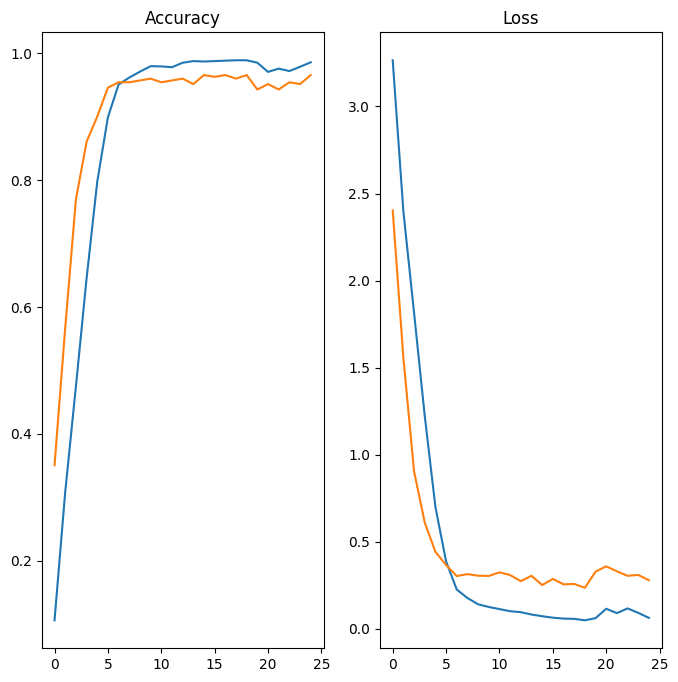

In [14]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

### Make Predictions on a Custom Image

In [15]:
image = 'samples/kiwi.webp'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [16]:
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)
print(f'Veg/Fruit in image is {data_cat[np.argmax(score)]}')
print(f'accuracy of {np.max(score) * 100:0.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Veg/Fruit in image is kiwi
accuracy of 98.67%


In [17]:
model.save('Image_classify.keras')